In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
%matplotlib inline

In [2]:
# Retrieve database from either localhost or MongoDB URI.
# Localhost only works if $mongod and $mongo are running from command line.

from pymongo import MongoClient
client = MongoClient(host='mongodb://localhost:27017/April-Data')
daily_strava = client['April-Data']

In [3]:
# Create DataFrames from database collections.

activities = pd.DataFrame(list(daily_strava.activities.find({})))
athletes = pd.DataFrame(list(daily_strava.athletes.find({})))
segmentefforts = pd.DataFrame(list(daily_strava.segmentefforts.find({})))
segmentleaderboards = pd.DataFrame(list(daily_strava.segmentleaderboards.find({})))
segments = pd.DataFrame(list(daily_strava.segments.find({})))
sessions = pd.DataFrame(list(daily_strava.sessions.find({})))
weather = pd.DataFrame(list(daily_strava.weathers.find({})))

In [4]:
weather.columns

Index(['__v', '_id', 'apparentTemperature', 'cloudCover', 'createdAt', 'date',
       'dewPoint', 'humidity', 'icon', 'latitude', 'location', 'longitude',
       'ozone', 'precipIntensity', 'precipProbability', 'precipType',
       'pressure', 'summary', 'temperature', 'updatedAt', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed'],
      dtype='object')

In [5]:
# Converting bson.ObjectId objects to strings.

segmentleaderboards[['leaderboard','segment']] = segmentleaderboards[['_id','segment']].astype(str)
activities[['activity','athlete']] = activities[['_id','athlete']].astype(str)
athletes['athlete'] = athletes['_id'].astype(str)
segmentefforts[['effort','activity','athlete','segment','leaderboard','weather']] = segmentefforts[['_id','activity','athlete','segment','leaderboard','weather']].astype(str)
segments['segment'] = segments['_id'].astype(str)
weather['weather_id'] = weather['_id'].astype(str)

In [6]:
# Dropping unwanted columns

activities.drop(['__v',
 '_id',
 'achievementCount',
 

 'averageCadence',
 'averageHeartrate',
 'averageSpeed',
 'averageWatts',
 'bestEfforts',
 'calories',
 'commute',
 'createdAt',

 'deviceName',
 'deviceWatts',


 'elevationHigh',
 'elevationLow',
 'embedToken',
 'endLatLng',
 'flagged',
 'gear',
 'hasHeartrate',
 'kilojoules',
 'laps',
 'locationCity',
 'locationCountry',
 'locationState',
 'manual',
 'map',
 'maxHeartrate',
 'maxSpeed',
 'maxWatts',


 'photoCount',
 'photos',
 'prCount',
 'private',
 'segmentLeaderboardOptOut',
 'segmentLeaderboardsReady',
 'splitsImperial',
 'splitsMetric',
 
 'startDateLocal',
 'startLatLng',

 'sufferScore',
 'timezone',
 'totalElevationGain',
 'totalPhotoCount',
 'trainer',
 'type',
 'updatedAt',
 'weightedAverageWatts',
 'workoutType'],inplace=True, axis=1)
athletes.drop(['__v',
 '_id',
 'accessToken',
 'avatar',
 'avatarMedium',


 'createdAt',
 'email',

 'isAdmin',


 'premium',
 'raw',
 'state',
 'stravaCreatedAt',

 'stravaUpdatedAt',
 'updatedAt'],inplace=True, axis=1)
segmentefforts.drop(['__v',
 '_id',


 'averageCadence',
 'averageHeartrate',
 'averageWatts',
 'createdAt',
 'dailyEntryCount',
 'date',

 'deviceWatts',


 'endIndex',
 'hazardous',
 'hidden',
 'komRank',

 'leaderboardOptOut',
 'maxHeartrate',


 'prRank',
 'private',


 'startDateLocal',
 'startIndex',


 'updatedAt'],inplace=True, axis=1)
segmentleaderboards.drop(['__v',
 '_id', 
 'analysed',
 'createdAt',


 'inTopTen',


 'topTenThreshold',
 'updatedAt'],inplace=True, axis=1)
segments.drop(['__v',
 '_id', 
 'athleteCount',

 'averageGrade',

 'climbCategory',

 'createdAt',

 'elevationHigh',
 'elevationLow',
 'endLatLng',
 'hazardous',
 'maxGrade',

 'private',
 'startLatLng',


 'totalElevationGain',
 'updatedAt'],inplace=True, axis=1)
weather.drop(['__v',
'_id',
'createdAt',
'ozone',
'updatedAt'], inplace = True, axis = 1
)

In [7]:
# All the variables

print('activities')
print(
    list(activities.columns.values))
print('\n')
print('athletes')
print(
    list(athletes.columns.values))
print('\n')
print('segmentefforts')
print(
    list(segmentefforts.columns.values))
print('\n')
print('segmentleaderboards')
print(
    list(segmentleaderboards.columns.values))
print('\n')
print('segments')
print(
    list(segments.columns.values))
print('\n')
print('Weather')
print(
    list(weather.columns.values))

# Cross-references: 'activity', athlete', 'leaderboard', 'segment', 'stravaId' and 'stravaSegmentId'

activities
['athlete', 'athleteCount', 'bronzeCount', 'description', 'distance', 'elapsedTime', 'gearId', 'goldCount', 'movingTime', 'name', 'processedCount', 'segmentCount', 'silverCount', 'startDate', 'stravaId', 'utcOffset', 'activity']


athletes
['city', 'country', 'firstName', 'lastName', 'name', 'stravaId', 'athlete']


segmentefforts
['activity', 'activityType', 'athlete', 'athleteName', 'dailyRank', 'distance', 'elapsedTime', 'leaderboard', 'movingTime', 'name', 'segment', 'startDate', 'stravaActivityId', 'stravaId', 'stravaSegmentId', 'utcOffset', 'weather', 'effort']


segmentleaderboards
['date', 'entries', 'entryCount', 'segment', 'stravaSegmentId', 'leaderboard']


segments
['activityType', 'centerLatLng', 'city', 'country', 'distance', 'name', 'state', 'stravaId', 'utcOffset', 'segment']


Weather
['apparentTemperature', 'cloudCover', 'date', 'dewPoint', 'humidity', 'icon', 'latitude', 'location', 'longitude', 'precipIntensity', 'precipProbability', 'precipType', 'pressu

In [57]:
#Testing variables
segment_id = '5a6ed93ff90b129aaae0ddfe'
activity_id = '5a6ed93ff90b129aaae0ddea'
date = '2018-01-29'
athlete_name = 'Daniel C.'

# Analysing a segment

Creating leaderboards for a segment.


In [46]:
#Generates a leaderboard for a given day and segment.
def daily_leaderboard(segment_id, date=pd.Timestamp.today):
    '''Creates a pandas.DataFrame of the leaderboard for a given segment in the segmentleaderboards table'''
    date = pd.to_datetime(str(date))
    leaderboard = segmentleaderboards[(segmentleaderboards['date'] == date) & (segmentleaderboards['segment'] == str(segment_id))]
    index = leaderboard.index[leaderboard['segment'] == segment_id][0]
    leaderboard = pd.DataFrame(leaderboard['entries'][index])
    return leaderboard

In [48]:
daily_leaderboard(segment_id,date)

,_id,athleteName,elapsedTime,movingTime,rank,startDate,startDateLocal
0,5a6faeaaa3e49300142b809e,Phil S.,71,71,1,2018-01-29 06:36:18,2018-01-29 06:36:18
1,5a6faeaaa3e49300142b809d,Daniel C.,72,72,2,2018-01-29 07:43:03,2018-01-29 07:43:03
2,5a6faeaaa3e49300142b809c,Charlie H.,75,75,3,2018-01-29 08:12:40,2018-01-29 08:12:40
3,5a6faeaaa3e49300142b809b,Ralph D.,75,75,3,2018-01-29 11:27:07,2018-01-29 11:27:07
4,5a6faeaaa3e49300142b809a,Jono R.,76,76,5,2018-01-29 06:41:26,2018-01-29 06:41:26
5,5a6faeaaa3e49300142b8099,Guy C.,77,77,6,2018-01-29 06:07:31,2018-01-29 06:07:31
6,5a6faeaaa3e49300142b8098,Griff L.,77,77,6,2018-01-29 06:36:14,2018-01-29 06:36:14
7,5a6faeaaa3e49300142b8097,Nick R.,77,77,6,2018-01-29 06:40:54,2018-01-29 06:40:54
8,5a6faeaaa3e49300142b8096,James L.,77,77,6,2018-01-29 07:55:08,2018-01-29 07:55:08
9,5a6faeaaa3e49300142b8095,Barney C.,78,78,10,2018-01-29 07:24:04,2018-01-29 07:24:04


### Generating an overall leaderboard

Which gives every entry on a segment within a given time interval. Athletes will appear multiple times in this leaderboard.

In [10]:
def overall_leaderboard(segment_id, startDate=pd.Timestamp.min, endDate=pd.Timestamp.max):
    '''Generates an overall leaderboard for a segment between two given dates. If no dates given, defaults to all available dates'''
    seg_leaderboard = segmentleaderboards[segmentleaderboards['segment'] == str(segment_id)]
    startDate = pd.to_datetime(startDate) #So date arguments can be entered as a string
    endDate = pd.to_datetime(endDate)
    seg_leaderboard = seg_leaderboard[(seg_leaderboard['date'] >= startDate) & (seg_leaderboard['date'] <= endDate)]
    overall_leaderboard = pd.DataFrame(list([item for sublist in seg_leaderboard['entries'] for item in sublist])) #Unpacking JSON.
    overall_leaderboard['overallRank'] = overall_leaderboard.rank(axis=0, method='dense')['elapsedTime'] #Creates an overall rank for each athlete.
    overall_leaderboard.rename(columns={'rank' : 'dailyRank'},inplace=True)
    #overall_leaderboard['stationaryTime'] = overall_leaderboard['elapsedTime'] - overall_leaderboard['movingTime'] #Time spent not moving. Useful for analysis?
    return overall_leaderboard.sort_values(['overallRank','startDate']).drop_duplicates(subset=['elapsedTime','movingTime','athleteName','startDate'])#Sort by rank and then drop duplicate entries

In [11]:
overall_leaderboard('5a6ed93ff90b129aaae0ddfe').head()

,_id,athlete,athleteName,elapsedTime,movingTime,dailyRank,startDate,startDateLocal,overallRank
1454,5aa85f146a3d7c0014901148,None,Darren Y.,64,64,1,2018-03-13 05:24:59,2018-03-13 05:24:59,1.0
4188,5ad675c9cb5448001451c423,None,Steve D.,66,66,1,2018-04-17 16:26:15,2018-04-17 17:26:15,2.0
4288,5ad7c75611028c0014c43828,None,Matt O.,67,67,1,2018-04-18 05:19:41,2018-04-18 06:19:41,3.0
2878,5ac40099a45a1900141e3492,None,Steve D.,68,68,1,2018-04-03 16:27:10,2018-04-03 17:27:10,4.0
3288,5ac946aa0a4ab400149b62e0,None,Garry N.,68,68,1,2018-04-07 13:38:33,2018-04-07 14:38:33,4.0


### Aggregate Leaderboards


Leaderboards of everybody's average time on a segment. So you can see where you compare on average.
Athletes only appear once and you must ride the segment a minimum number of times to be listed on the leaderboard.

In [12]:
def agg_leaderboard(segment_id, startDate=pd.Timestamp.min, endDate=pd.Timestamp.max, min_efforts=5):
    '''Generates a leaderboard based on average effort for a segment. Athlete must have made at least min_efforts attempts before being included in leaderboard. This assumes athletes with the same name are the same person'''
#Question: Should min_efforts default be a function of endDate-startDate?
    groupby_athlete = pd.DataFrame(overall_leaderboard(segment_id, startDate, endDate)).groupby('athleteName') #creates a groupby object.
    agg_leaderboard = pd.DataFrame(groupby_athlete.mean()['elapsedTime']) #Creates the dataframe
    agg_leaderboard['effortCount'] = groupby_athlete.count()['elapsedTime'] #Adds effortCount
    agg_leaderboard = agg_leaderboard[agg_leaderboard['effortCount'] >= min_efforts] #Removes athletes with < min_efforts.
    agg_leaderboard['rank'] = agg_leaderboard['elapsedTime'].rank(method='dense')
    return agg_leaderboard.reset_index().sort_values('rank')

In [54]:
def give_position(athlete_name, leaderboard):
    '''Returns normalised rank (out of 100). ie percentage of the way up the leaderboard you are.'''
    rank = int(np.mean(leaderboard[leaderboard['athleteName'] == str(athlete_name)]['rank'])) #Athlete's rank in leaderboard
    athlete_count = len(leaderboard) #Total Number of athletes.
    return (rank/athlete_count)*100
    

In [55]:
give_position('Daniel C.', daily_leaderboard(segment_id,date))

18.181818181818183

In [61]:
list_of_leaderboards = create_activity_segment_leaderboards(activity_id)
list_of_leaderboards

There are 32 segments in activity '5a6ed93ff90b129aaae0ddea'.


[                        _id  athleteName  elapsedTime  movingTime  rank  \
 0  5a6faeaaa3e49300142b8069      Andy L.           38          38     1   
 1  5a6faeaaa3e49300142b8068  Seymours C.           39          39     2   
 2  5a6faeaaa3e49300142b8067      Adam S.           40          40     3   
 3  5a6faeaaa3e49300142b8066    Barney C.           41          41     4   
 4  5a6faeaaa3e49300142b8065    Tobias R.           42          42     5   
 5  5a6faeaaa3e49300142b8064    Albert F.           42          42     5   
 6  5a6faeaaa3e49300142b8063    Justin B.           42          42     5   
 7  5a6faeaaa3e49300142b8062      Will N.           42          42     5   
 8  5a6faeaaa3e49300142b8061       Ian C.           42          42     5   
 9  5a6faeaaa3e49300142b8060     David S.           42          42     5   
 
             startDate      startDateLocal  
 0 2018-01-29 07:14:58 2018-01-29 07:14:58  
 1 2018-01-29 09:19:49 2018-01-29 09:19:49  
 2 2018-01-29 08:43:11 2018

In [62]:
positions = [give_position(athlete_name, item) for item in list_of_leaderboards]

ValueError: cannot convert float NaN to integer

# Clustering a leaderboard

This will be turned into a few useful pipelines soon.

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3)

In [17]:
test = agg_leaderboard('5a6ed93ff90b129aaae0ddfe')

In [18]:
ktest = test['elapsedTime'].reshape(-1,1)

C:\Users\Crispy\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [19]:
kmeans.fit(ktest)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [21]:
test['labels'] = kmeans.labels_

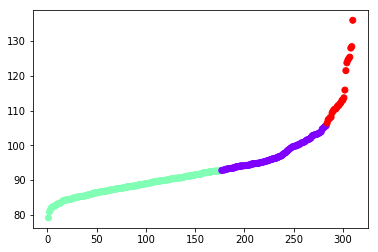

In [22]:
plt.scatter(test['rank'],test['elapsedTime'], c=test['labels'], cmap='rainbow')

In [23]:
#Traffic light clusters?
#sns.regplot(test['elapsedTime'],test['movingTime'])

In [24]:
daily_leaderboard

<function __main__.daily_leaderboard>

# Analysing activities

In [25]:
# Adding segmenteffort data into activities table.
g = pd.DataFrame(segmentefforts.groupby('activity').apply(lambda x:x.to_json(orient='records')))
g.rename(columns={0:'segmentefforts'}, inplace = True)
activities = activities.join(g, on='activity',rsuffix='_')

In [49]:
def create_activity_segment_leaderboards(activity_id):
    '''Creates a list of pd.DataFrame leaderboards. One for each segment on an activity. Subscript list by index to give a leaderboard.'''
    segment_list = list(pd.read_json(activities[activities['activity'] == str(activity_id)]['segmentefforts'][0])['segment']) #This [0] needs to change as done in daily_ldb. Index isn't always 0?
    leaderboard_list = [daily_leaderboard(item,date) for item in segment_list] #Works with agg_ldb not daily_ldb???
    print('There are '+str(len(leaderboard_list))+' segments in activity \''+str(activity_id)+'\'.')
    return leaderboard_list

In [50]:
def analyse_activity(activity_id):
    '''Takes the output from create_activity_segment_leaderboards function and gives useful information'''
    list_of_leaderboards = create_activity_segment_leaderboards(activity_id)
    athlete_id = activities[activities['activity'] == activity_id]['athlete'][0]
    athlete_name = athletes[athletes['athlete'] == athlete_id]['firstName'][0]+' '+athletes[athletes['athlete'] == athlete_id]['lastName'][0][0]+'.' #This gives the name in the right format for the leaderboards ('John D.').
    positions = [give_position(athlete_name, item) for item in list_of_leaderboards]
    print('Your average segment position on this activity was '+str(np.mean(positions))+' out of 100.')
    print('Your top segment position was '+str(min(positions))+' out of 100.')
    return pd.DataFrame(positions).plot(legend=False)

In [51]:
create_activity_segment_leaderboards(activity_id)

There are 32 segments in activity '5a6ed93ff90b129aaae0ddea'.


[                        _id  athleteName  elapsedTime  movingTime  rank  \
 0  5a6faeaaa3e49300142b8069      Andy L.           38          38     1   
 1  5a6faeaaa3e49300142b8068  Seymours C.           39          39     2   
 2  5a6faeaaa3e49300142b8067      Adam S.           40          40     3   
 3  5a6faeaaa3e49300142b8066    Barney C.           41          41     4   
 4  5a6faeaaa3e49300142b8065    Tobias R.           42          42     5   
 5  5a6faeaaa3e49300142b8064    Albert F.           42          42     5   
 6  5a6faeaaa3e49300142b8063    Justin B.           42          42     5   
 7  5a6faeaaa3e49300142b8062      Will N.           42          42     5   
 8  5a6faeaaa3e49300142b8061       Ian C.           42          42     5   
 9  5a6faeaaa3e49300142b8060     David S.           42          42     5   
 
             startDate      startDateLocal  
 0 2018-01-29 07:14:58 2018-01-29 07:14:58  
 1 2018-01-29 09:19:49 2018-01-29 09:19:49  
 2 2018-01-29 08:43:11 2018

In [56]:
analyse_activity('5a6ed93ff90b129aaae0ddea')

There are 32 segments in activity '5a6ed93ff90b129aaae0ddea'.


ValueError: cannot convert float NaN to integer

In [31]:
activities

,athlete,athleteCount,bronzeCount,description,distance,elapsedTime,gearId,goldCount,movingTime,name,processedCount,segmentCount,silverCount,startDate,stravaId,utcOffset,activity,segmentefforts
0,5a6d2bcd817cc8007d8398ef,NaN,[],None,9315.2,NaN,NaN,[],NaN,Morning Ride,[],NaN,[],2018-01-29 07:36:19,1380942966,NaN,5a6ed93ff90b129aaae0ddea,"[{""activity"":""5a6ed93ff90b129aaae0ddea"",""activ..."
1,5a6d2bcd817cc8007d8398ef,NaN,[],None,10508.1,NaN,NaN,[],NaN,Afternoon Ride,[],NaN,[],2018-01-29 16:33:05,1381493758,NaN,5a6f57eff90b129aaae6e37d,"[{""activity"":""5a6f57eff90b129aaae6e37d"",""activ..."
2,5a6d2bcd817cc8007d8398ef,NaN,[],None,9240.1,NaN,NaN,[],NaN,Morning Ride,[],NaN,[],2018-01-30 07:35:01,1382438890,NaN,5a702acff90b129aaaef58d2,"[{""activity"":""5a702acff90b129aaaef58d2"",""activ..."
3,5a6d2bcd817cc8007d8398ef,NaN,[],None,10091.8,NaN,NaN,[],NaN,Afternoon Ride,[],NaN,[],2018-01-30 16:42:44,1383138607,NaN,5a70a957f90b129aaaf5b833,"[{""activity"":""5a70a957f90b129aaaf5b833"",""activ..."
4,5a74a8e5f90b129aaa190935,1.0,[],None,4761.3,1229.0,NaN,[],1229.0,Evening Run,[],NaN,[],2018-04-18 18:11:24,1516733945,NaN,5ad7a8b9f90b129aaa2e4a2d,"[{""activity"":""5ad7a8b9f90b129aaa2e4a2d"",""activ..."
5,5a6d2bcd817cc8007d8398ef,1.0,[],None,9316.9,1678.0,NaN,[],1388.0,Morning Ride,[],NaN,[],2018-01-31 07:37:46,1384219422,NaN,5a717c58f90b129aaafe2903,"[{""activity"":""5a717c58f90b129aaafe2903"",""activ..."
6,5a6d2bcd817cc8007d8398ef,1.0,[],None,9998.0,2133.0,NaN,[],1601.0,Afternoon Ride,[],NaN,[],2018-02-01 16:36:41,1386492077,NaN,5a7357dcf90b129aaa0ec3a5,"[{""activity"":""5a7357dcf90b129aaa0ec3a5"",""activ..."
7,5a6d2bcd817cc8007d8398ef,1.0,[],None,9410.4,2121.0,NaN,[],1709.0,Taking it slowwww,[],NaN,[],2018-02-02 08:06:20,1387481198,NaN,5a742de9f90b129aaa14d091,"[{""activity"":""5a742de9f90b129aaa14d091"",""activ..."
8,5a6d2bcd817cc8007d8398ef,1.0,[],None,10032.4,1828.0,NaN,[],1462.0,Afternoon Ride,[],NaN,[],2018-02-02 17:21:13,1388089845,NaN,5a74ac2af90b129aaa192a50,"[{""activity"":""5a74ac2af90b129aaa192a50"",""activ..."
9,5a74a8e5f90b129aaa190935,1.0,[],None,5342.3,1493.0,NaN,[],1493.0,Morning Run,[],NaN,[],2018-02-03 09:19:04,1388920298,NaN,5a759383f90b129aaa205500,"[{""activity"":""5a759383f90b129aaa205500"",""activ..."
